In [14]:
import warnings
from pandas import Series
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import accuracy_score
import matplotlib
%matplotlib inline
warnings.filterwarnings("ignore")  # Убирает некритические сообщения
plt.style.use('ggplot')

In [15]:
data_t = pd.read_csv('./train.csv')

In [16]:
data_t.head(10)

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,M,62,Y,Y,0,0,1,1,2,18000,N,0
1,63161,SCH,F,59,N,N,0,0,3,2,3,19000,N,0
2,25887,SCH,M,25,Y,N,2,0,1,1,2,30000,Y,0
3,16222,SCH,F,53,N,N,0,0,2,2,3,10000,N,0
4,101655,GRD,M,48,N,N,0,1,1,2,3,30000,Y,0
5,41415,SCH,M,27,Y,N,0,1,0,1,1,15000,N,0
6,28436,SCH,M,39,N,N,0,0,0,1,2,28000,N,0
7,68769,SCH,F,39,N,N,0,0,1,2,3,45000,N,0
8,38424,SCH,F,50,Y,N,1,0,0,1,1,30000,N,0
9,4496,UGR,F,54,N,N,0,0,1,2,3,24000,N,0


In [22]:
from sklearn.model_selection import train_test_split

In [24]:
train, validation = train_test_split(data_t, test_size=0.33, shuffle=True)

In [26]:
pd.set_option('display.max_columns', None)
print('Размерность тренировочного датасета: ', data_t.shape)
display(data_t.head(3))
print('Размерность тестового датасета: ', train, validation.shape)
display(train, validation.head(3))

Размерность тренировочного датасета:  (73799, 14)


,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,M,62,Y,Y,0,0,1,1,2,18000,N,0
1,63161,SCH,F,59,N,N,0,0,3,2,3,19000,N,0
2,25887,SCH,M,25,Y,N,2,0,1,1,2,30000,Y,0


Размерность тестового датасета:         client_id education sex  age car car_type  decline_app_cnt  good_work  \
35757      57442       SCH   F   46   N        N                0          0   
50961      96061       UGR   F   30   Y        N                1          0   
37228      77038       UGR   F   28   N        N                0          0   
7698       90886       GRD   M   32   Y        N                0          0   
14314      28166       SCH   F   46   N        N                0          0   
...          ...       ...  ..  ...  ..      ...              ...        ...   
45749     105052       SCH   F   32   N        N                0          0   
22676      90001       SCH   M   37   N        N                0          0   
31352      81661       UGR   M   25   N        N                1          0   
24839      30069       UGR   F   30   Y        N                0          1   
15418      72566       SCH   M   36   Y        Y                2          0   

      

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
35757,57442,SCH,F,46,N,N,0,0,4,1,2,25000,N,0
50961,96061,UGR,F,30,Y,N,1,0,3,2,3,12000,N,0
37228,77038,UGR,F,28,N,N,0,0,0,1,2,20000,N,0
7698,90886,GRD,M,32,Y,N,0,0,1,2,3,30000,N,0
14314,28166,SCH,F,46,N,N,0,0,5,2,3,45000,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45749,105052,SCH,F,32,N,N,0,0,3,2,3,16000,N,0
22676,90001,SCH,M,37,N,N,0,0,0,2,3,27000,N,0
31352,81661,UGR,M,25,N,N,1,0,0,1,2,37900,N,0
24839,30069,UGR,F,30,Y,N,0,1,1,1,1,30000,N,0


,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
13446,47850,GRD,F,42,Y,Y,0,0,2,1,1,100000,N,0
11045,14907,PGR,M,42,Y,Y,0,0,6,1,1,57000,N,0
23479,22829,GRD,M,29,Y,Y,0,0,0,1,2,37000,N,0


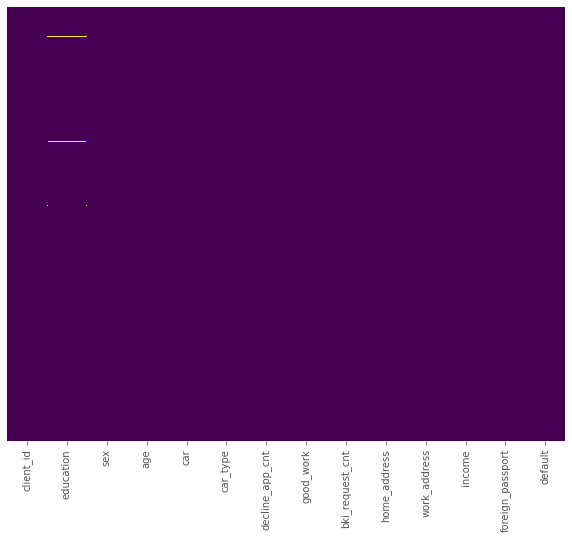

In [10]:
#Работа с пропусками
data_t.isnull().sum()
fig, ax = plt.subplots(figsize=(10, 8))
sns_heatmap = sns.heatmap(data_t.isnull(),
                          yticklabels=False,
                          cbar=False,
                          cmap='viridis')

<AxesSubplot:xlabel='education', ylabel='count'>

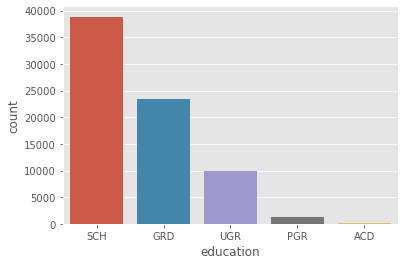

In [13]:
# посмотрим на распределение образования
sns.countplot(data_t['education'])
# видно, что большая часть заёмщиков имеет образование SCH

In [28]:
# заполним пропуски наиболее частыми значениями

c_1 = collections.Counter(data_t['education'])

data_t['education'].fillna(c_1.most_common()[0][0], inplace=True)
# проверим заполнение
data_t.isnull().sum()

client_id           0
education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
bki_request_cnt     0
home_address        0
work_address        0
income              0
foreign_passport    0
default             0
dtype: int64

In [76]:
#Разделим колонки по типам данным для большего удобства работы и изучения
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']
cat_cols = ['education', 'home_address', 'work_address']
num_cols = ['age', 'decline_app_cnt', 
            'bki_request_cnt', 'income']

<AxesSubplot:xlabel='default', ylabel='count'>

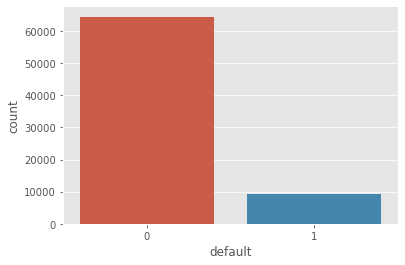

In [30]:
sns.countplot(data_t['default'])
#Распределение заёмщиков явно неравномерное, недефолтных клиентов заметно больше.

In [31]:
# попробуем oversampling для устранения дисбаланса
train_0 = data_t.query('default == 0')
train_1 = data_t.query('default == 1')
koeff = int(len(train_0)/len(train_1))
for i in range(koeff):
    data_t = data_t.append(train_1).reset_index(drop=True)  # объединяем
data_t['default'].value_counts()

1    65604
0    64427
Name: default, dtype: int64

<AxesSubplot:xlabel='default', ylabel='age'>

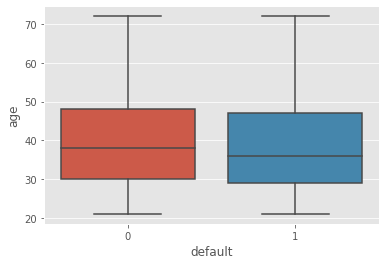

In [32]:
sns.boxplot(x=data_t.default, y=data_t.age)
# выбросов нет

In [33]:
#Недефолтные клиенты - старше дефолтных. Выбросов нет.

<AxesSubplot:xlabel='default', ylabel='decline_app_cnt'>

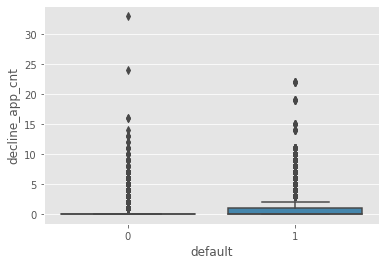

In [34]:
sns.boxplot(x=data_t.default, y=data_t.decline_app_cnt)
#Со временем банк научился чаще выдавать кредиты, что очевидно повысило его прибыльность. Выбросов нет.

In [35]:
#У дефолтных клиентов количество отклоненных заявок выше, чем у недефолтных. Есть выбросы, но удалять их нецелесообразно, 
#т.к. медиана у нас равна практически 0 и весь этот признак обратится в 0. Но он может оказать влияние.

<AxesSubplot:xlabel='default', ylabel='bki_request_cnt'>

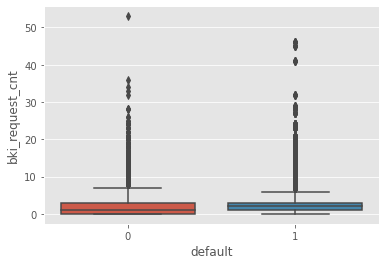

In [43]:
sns.boxplot(x=data_t.default, y=data_t.bki_request_cnt)

<AxesSubplot:xlabel='default', ylabel='income'>

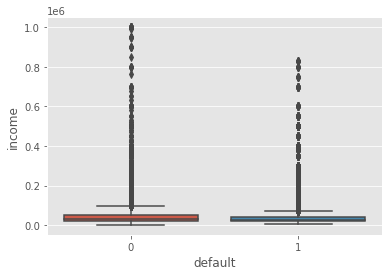

In [44]:
sns.boxplot(x=data_t.default, y=data_t.income)

In [38]:
#Кредиты чаще выдают тем, у кого уровень дохода выше-логично.

In [39]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130031 entries, 0 to 130030
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   client_id         130031 non-null  int64 
 1   education         130031 non-null  object
 2   sex               130031 non-null  object
 3   age               130031 non-null  int64 
 4   car               130031 non-null  object
 5   car_type          130031 non-null  object
 6   decline_app_cnt   130031 non-null  int64 
 7   good_work         130031 non-null  int64 
 8   bki_request_cnt   130031 non-null  int64 
 9   home_address      130031 non-null  int64 
 10  work_address      130031 non-null  int64 
 11  income            130031 non-null  int64 
 12  foreign_passport  130031 non-null  object
 13  default           130031 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 13.9+ MB


In [45]:
corr = data_t.corr()
corr.style.background_gradient(cmap='hot').set_precision(3)
#Высокой корреляции между признаками не наблюдается

,client_id,age,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,default
client_id,1.000,0.018,-0.024,0.010,-0.030,0.127,0.132,0.002,-0.059
age,0.018,1.000,-0.127,-0.064,0.055,0.015,0.002,-0.014,-0.038
decline_app_cnt,-0.024,-0.127,1.000,-0.026,0.175,0.026,0.029,-0.028,0.142
good_work,0.010,-0.064,-0.026,1.000,0.012,-0.020,-0.025,0.014,-0.068
bki_request_cnt,-0.030,0.055,0.175,0.012,1.000,0.020,0.019,0.094,0.107
home_address,0.127,0.015,0.026,-0.020,0.020,1.000,0.748,0.023,0.130
work_address,0.132,0.002,0.029,-0.025,0.019,0.748,1.000,0.035,0.129
income,0.002,-0.014,-0.028,0.014,0.094,0.023,0.035,1.000,-0.063
default,-0.059,-0.038,0.142,-0.068,0.107,0.130,0.129,-0.063,1.000


Text(0.5, 0, 'F-value')

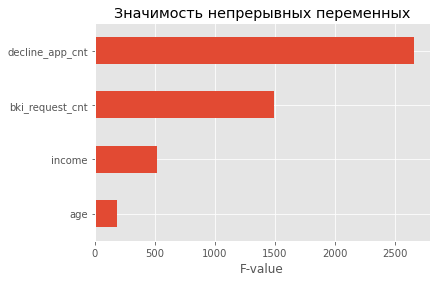

In [46]:
imp_num = pd.Series(f_classif(data_t[num_cols], data_t['default'])[0],index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')
plt.title('Значимость непрерывных переменных')
plt.xlabel('F-value')

In [47]:
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(data_t['sex']))
print(dict(enumerate(label_encoder.classes_)))

{0: 'F', 1: 'M'}


In [48]:
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    data_t[column] = label_encoder.fit_transform(data_t[column])
    
# убедимся в преобразовании    
data_t.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,1,62,1,1,0,0,1,1,2,18000,0,0
1,63161,SCH,0,59,0,0,0,0,3,2,3,19000,0,0
2,25887,SCH,1,25,1,0,2,0,1,1,2,30000,1,0
3,16222,SCH,0,53,0,0,0,0,2,2,3,10000,0,0
4,101655,GRD,1,48,0,0,0,1,1,2,3,30000,1,0


Text(0.5, 1.0, 'Значимость бинарных переменных')

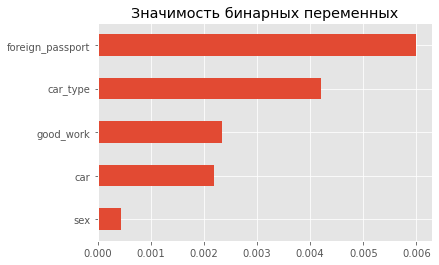

In [49]:
# Значимость бинарных признаков
imp_bin = Series(mutual_info_classif(data_t[bin_cols],
                                     data_t['default'],
                                     discrete_features=True),
                 index=bin_cols)
imp_bin.sort_values(inplace=True)
imp_bin.plot(kind='barh')
plt.title('Значимость бинарных переменных')

<AxesSubplot:>

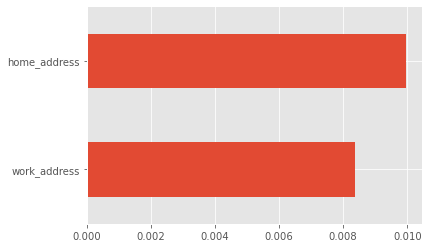

In [73]:
# Значимость категориальных признаков

imp_cat = pd.Series(mutual_info_classif(data_t[cat_cols],
                                        data_t['default'],
                                        discrete_features=True),
                    index=data_t[cat_cols].columns)
imp_cat.sort_values(inplace=True)
imp_cat.plot(kind='barh')

In [51]:
#Подготовка данных к машинному обучению

In [77]:
# Стандартизация числовых переменных

X_cat = OneHotEncoder(sparse = False).fit_transform(data_t[cat_cols].values)

In [78]:
X_cat.shape

(130031, 11)

In [80]:
X_num = StandardScaler().fit_transform(data_t[num_cols].values)

In [86]:
X_data_t = np.hstack([X_num, data_t[bin_cols].values, X_cat])
y_data_t = data_t['default'].values

In [87]:
# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

penalty = ['l1', 'l2']
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_data_t, y_data_t)

clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_data_t, y_data_t)

print('Лучший penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

Лучший penalty: l2
Лучшее C: 7.742636826811269


In [88]:
model = LogisticRegression(penalty='l2', C=7.742636826811269, max_iter=800)
model.fit(X_data_t, y_data_t)

LogisticRegression(C=7.742636826811269, max_iter=800)

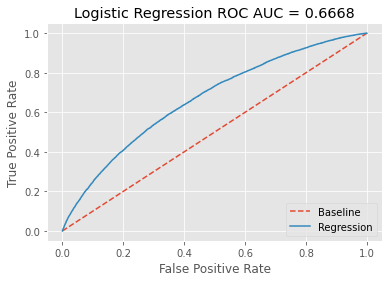

In [90]:
probs = model.predict_proba(X_data_t)
probs = probs[:, 1]


fpr, tpr, threshold = roc_curve(y_data_t, probs)
roc_auc = roc_auc_score(y_data_t, probs)

# Визуализация ROC AUC
plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label='Regression')
plt.title('Logistic Regression ROC AUC = %0.4f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [91]:
# Функция выводит метрики accuracy и f1-score
def print_logisitc_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f'acc = {acc:.2f} F1-score = {f1:.2f}')

In [92]:
Y_predicted = model.predict(X_data_t)
print_logisitc_metrics(y_data_t, Y_predicted)

acc = 0.62 F1-score = 0.63


<AxesSubplot:>

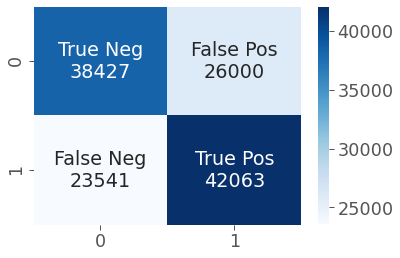

In [93]:
# confusion matrix
cm = confusion_matrix(y_data_t, Y_predicted)
# визуализация confusion matrix
sns.set_context(context='paper', font_scale=2, rc=None)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')